In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy.stats import linregress
import scipy.stats as st
import sklearn.datasets as dta
import seaborn as sns
import matplotlib.style as style
# Dependencies
import json
import requests
import gmaps
#from config import gkey
from collections import Counter

#gmaps.configure(api_key=gkey)

api_key1="16771f22"

In [5]:
csv_path = "archive/imdb_top_1000.csv"

# Import the CSV into a pandas DataFrame
topmovies_df = pd.read_csv(csv_path, low_memory=False)
topmovies_df
title_df=topmovies_df["Series_Title"]
title_df.head()
title_df=title_df.tolist()

#Extract Title of the movie and Country using OMDB API using movie titles listed in topmovie_df
title=[]
country=[]

url = f"http://www.omdbapi.com/?apikey={api_key1}&t="

for movies in title_df:
    target_url=url+movies
    response=requests.get(target_url).json()
    
    try:
        title.append(response['Title'])
    except:
        title.append("NA")
        print("Title Not Found")
        pass
    try:
        country.append(response['Country'])
        
    except:
        country.append("NA")
        print("Country Not Found")
        pass
    


Title Not Found
Country Not Found
Title Not Found
Country Not Found
Title Not Found
Country Not Found
Title Not Found
Country Not Found
Title Not Found
Country Not Found
Title Not Found
Country Not Found
Title Not Found
Country Not Found
Title Not Found
Country Not Found


KeyboardInterrupt: 

In [6]:
#Turn extracted movie titles and countries from OMDB into a dataframe
title_country_df=pd.DataFrame(list(zip(title, country)),columns =['Series_Title', 'Country'])
title_country_df


,Series_Title,Country
0,The Shawshank Redemption,United States
1,The Godfather,United States
2,The Dark Knight,"United States, United Kingdom"
3,The Godfather: Part II,United States
4,12 Angry Men,United States
...,...,...
67,The Lives of Others,"Germany, France"
68,NA,NA
69,Memento,United States
70,NA,NA


In [7]:
#Drop any rows that did not extract desired information
clean_tc_df = title_country_df[~title_country_df['Series_Title'].str.contains('NA')]
clean_tc_df

,Series_Title,Country
0,The Shawshank Redemption,United States
1,The Godfather,United States
2,The Dark Knight,"United States, United Kingdom"
3,The Godfather: Part II,United States
4,12 Angry Men,United States
...,...,...
65,Taare Zameen Par,India
66,WALL·E,United States
67,The Lives of Others,"Germany, France"
69,Memento,United States


In [8]:
#merge original dataframe with extracted dataframe from OMDB
merged_df=pd.merge(topmovies_df,clean_tc_df,on="Series_Title")
merged_df.head()
print(len(merged_df))

merged_df

merged_df=merged_df[["Series_Title","Country"]]
merged_df
mc = merged_df.set_index('Series_Title').apply(lambda col:
    col.str.split(', ?', expand=True).stack())\
    .droplevel(1).reset_index().fillna('')


type(mc["Country"].value_counts())

60


pandas.core.series.Series

In [9]:
#load csv file that contains coordinates of countries.
#merge two dataframe to obtain coordinates of countries

csv_path1 = "archive/world_country_and_usa_states_latitude_and_longitude_values.csv"
coordinates_df = pd.read_csv(csv_path1, low_memory=False)
coordinates_df=coordinates_df[["country","latitude","longitude"]]
coordinates_df
mc_df=pd.DataFrame(mc)
mc_df=mc_df.rename(columns={"Country":"country"})
mc_df
mg_cd_df=pd.merge(mc_df,coordinates_df,on='country')
# mg_cd_df=mg_cd_df.dropna(inplace=True)

In [10]:
#Create a heatmap using google maps to visualize countries appeared in Top 1000 movie by IMDB rating

locations=mg_cd_df[['latitude','longitude']]

fig=gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations,dissipating=False, max_intensity=10, point_radius=5)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [12]:
csv_path = "archive/imdb_top_1000.csv"

# Import the CSV into a pandas DataFrame
topmovies_df = pd.read_csv(csv_path, low_memory=False)


In [13]:
topmovies_df.loc[:,"Gross"]=topmovies_df.loc[:,"Gross"].str.replace(",","").astype(float)

In [15]:
clean_movies_df=topmovies_df[['Poster_Link' , 'Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre','IMDB_Rating' ,'Overview' , 'Meta_score' , 'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes' , 'Gross']].dropna()
clean_movies_df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0


In [16]:
Gross= clean_movies_df["Gross"]/1000000
clean_movies_df["Gross"] = Gross

In [17]:
No_of_Votes= clean_movies_df["No_of_Votes"]/100000
clean_movies_df["No_of_Votes"] = No_of_Votes

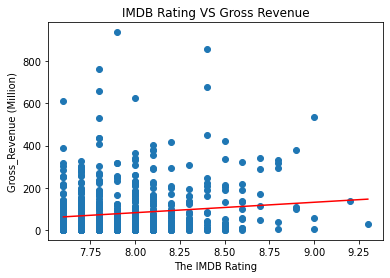

In [20]:
#Corrlation movie IMDB Rating Vs Gross Revenue by Rating
IMDB_Rating = clean_movies_df['IMDB_Rating']
Gross_Revenue = clean_movies_df['Gross']
x_values = IMDB_Rating
y_values = Gross_Revenue
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("IMDB Rating VS Gross Revenue")
plt.xlabel('The IMDB Rating')
plt.ylabel('Gross_Revenue (Million)')
#print(f"The r-squared is: {rvalue**2}")
plt.show()

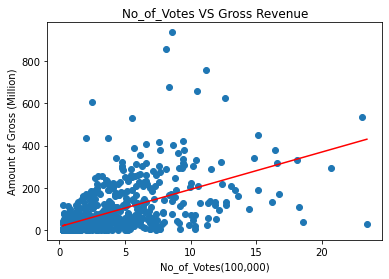

In [21]:
#Correlation between No of votes and Gross Renenue
No_of_Votes = clean_movies_df['No_of_Votes']
Gross_Revenue = clean_movies_df['Gross']
x_values = No_of_Votes
y_values = Gross_Revenue
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("No_of_Votes VS Gross Revenue")
plt.xlabel('No_of_Votes(100,000)')
plt.ylabel('Amount of Gross (Million)')
#print(f"The r-squared is: {rvalue**2}")
plt.show()

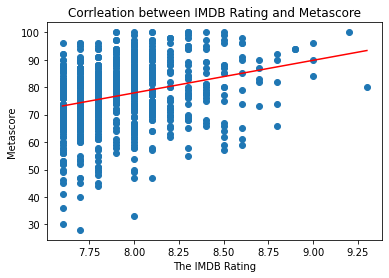

In [22]:
#Correlation between IMDB Rating and Meta score
IMDB_Rating = clean_movies_df['IMDB_Rating']
Meta_score = clean_movies_df['Meta_score']
x_values = IMDB_Rating
y_values = Meta_score
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.title("Corrleation between IMDB Rating and Metascore")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('The IMDB Rating')
plt.ylabel('Metascore')
#print(f"The r-squared is: {rvalue**2}")
plt.show()

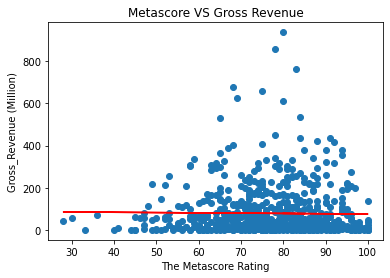

In [23]:
#Corrlation movie IMDB Rating Vs Gross Revenue by Rating
Meta_score = clean_movies_df['Meta_score']
Gross_Revenue = clean_movies_df['Gross']
x_values = Meta_score
y_values = Gross_Revenue
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Metascore VS Gross Revenue")
plt.xlabel('The Metascore Rating')
plt.ylabel('Gross_Revenue (Million)')
#print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.3883062578187025


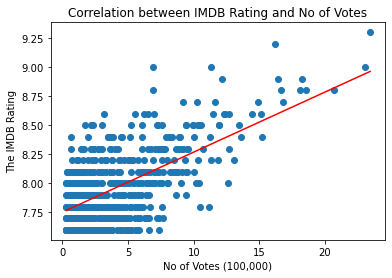

In [24]:
#Correlation between IMDB Rating and No of Votes
No_of_Votes = clean_movies_df['No_of_Votes']
IMDB_Rating = clean_movies_df['IMDB_Rating']
x_values = No_of_Votes
y_values = IMDB_Rating
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Correlation between IMDB Rating and No of Votes')
plt.xlabel('No of Votes (100,000)')
plt.ylabel('The IMDB Rating')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.3883062578187025


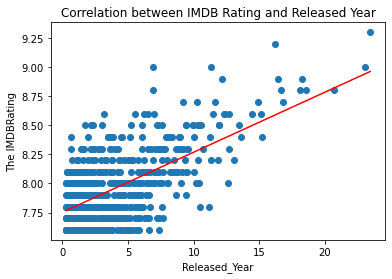

In [26]:
# IMDB Rating Vs Released year 
Released_Year = clean_movies_df['Released_Year']
IMDB_Rating = clean_movies_df['IMDB_Rating']
x_values = No_of_Votes
y_values = IMDB_Rating
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Correlation between IMDB Rating and Released Year')
plt.xlabel('Released_Year')
plt.ylabel('The IMDBRating')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [27]:
clean_movies_df.corr()

,IMDB_Rating,Meta_score,No_of_Votes,Gross
IMDB_Rating,1.000000,0.280894,0.623142,0.125992
Meta_score,0.280894,1.000000,0.029744,-0.014801
No_of_Votes,0.623142,0.029744,1.000000,0.544882
Gross,0.125992,-0.014801,0.544882,1.000000


In [28]:
clean_movies_df.describe(include = ['O'])

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,Overview,Director,Star1,Star2,Star3,Star4
count,714,714,714,714,714,714,714,714,714,714,714,714
unique,714,714,83,12,118,172,714,402,472,599,626,671
top,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,2014,U,130 min,Drama,Two imprisoned men bond over a number of years...,Steven Spielberg,Tom Hanks,Emma Watson,Rupert Grint,Michael Caine
freq,1,1,28,183,20,58,1,13,12,7,5,4


In [29]:
top_voted = clean_movies_df.sort_values(['No_of_Votes'], ascending = False)

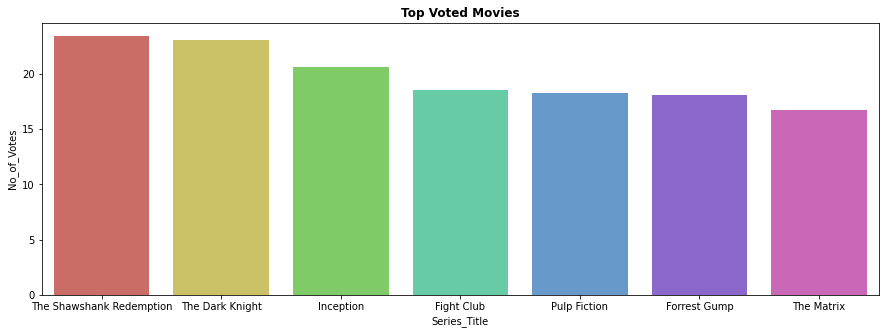

In [30]:
fig,axs=plt.subplots(figsize=(15,5))
g=sns.barplot(x=top_voted['Series_Title'][:7],y=top_voted['No_of_Votes'][:7], palette = 'hls')
g.set_title("Top Voted Movies", weight = "bold")
plt.show()

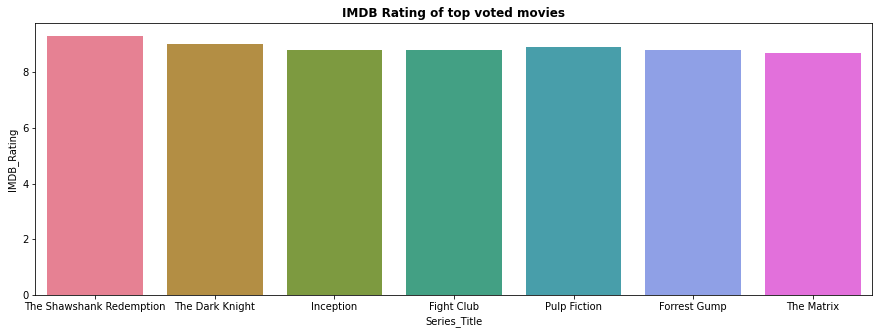

In [31]:
fig,axs=plt.subplots(figsize=(15,5))
g=sns.barplot(x=top_voted['Series_Title'][:7],y=top_voted['IMDB_Rating'][:7], palette = 'husl')
g.set_title("IMDB Rating of top voted movies", weight = "bold")
plt.show()


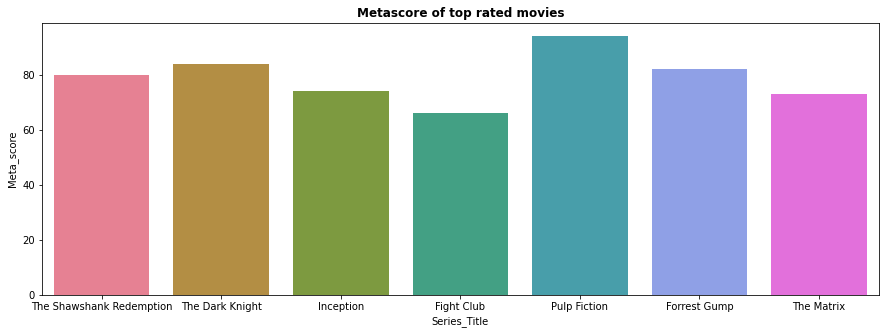

In [32]:
fig,axs=plt.subplots(figsize=(15,5))
g=sns.barplot(x=top_voted['Series_Title'][:7],y=top_voted['Meta_score'][:7], palette = 'husl')
g.set_title("Metascore of top rated movies", weight = "bold")
plt.show()

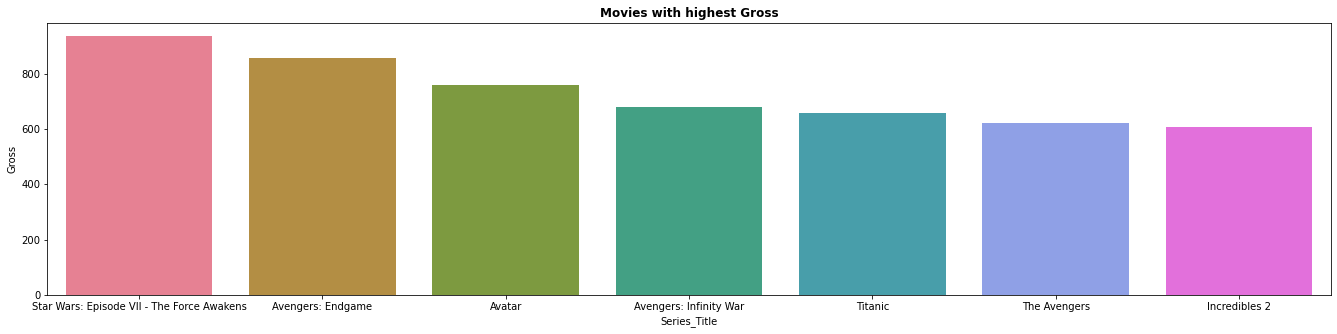

In [33]:
#top movies by Gross
highest_earning = clean_movies_df.sort_values(['Gross'], ascending = False)
fig,axs=plt.subplots(figsize=(23,5))
g=sns.barplot(x=highest_earning['Series_Title'][:7],y=highest_earning['Gross'][:7], palette = 'husl')
g.set_title("Movies with highest Gross", weight = "bold")
plt.show()


In [35]:
csv_path = "archive/imdb_top_1000.csv"

# Import the CSV into a pandas DataFrame
topmovies_df = pd.read_csv(csv_path, low_memory=False)


In [36]:
#drop null rows
topmovies_df=topmovies_df[["Genre","IMDB_Rating","Certificate","Gross"]]
no_null_topmovies_df = topmovies_df.dropna(how='any')
topmovies_df=no_null_topmovies_df
no_null_topmovies_df.count()

Genre          785
IMDB_Rating    785
Certificate    785
Gross          785
dtype: int64

In [37]:
cleaned_topmovies_df=topmovies_df[["Genre", "IMDB_Rating"]]
cleaned_topmovies_df.head()

,Genre,IMDB_Rating
0,Drama,9.3
1,"Crime, Drama",9.2
2,"Action, Crime, Drama",9.0
3,"Crime, Drama",9.0
4,"Crime, Drama",9.0


In [38]:
genre_values=topmovies_df["Genre"].value_counts()
genre_values

Drama                        64
Drama, Romance               29
Comedy, Drama                26
Comedy, Drama, Romance       25
Biography, Drama, History    23
                             ..
Drama, History                1
Drama, Film-Noir, Mystery     1
Adventure, Thriller           1
Animation, Action, Sci-Fi     1
Adventure, Comedy, War        1
Name: Genre, Length: 178, dtype: int64

In [39]:
cleaned_topmovies_df.astype({'IMDB_Rating': 'str'}).dtypes

Genre          object
IMDB_Rating    object
dtype: object

In [40]:
result = cleaned_topmovies_df.set_index('IMDB_Rating').apply(lambda col:
    col.str.split(', ?', expand=True).stack())\
    .droplevel(1).reset_index().fillna('')

In [41]:
genre_values=result["Genre"].value_counts()

In [42]:
#Count of Genre Types in alphabetical order (series)
genre_values_sorted = genre_values.sort_index(axis=0, ascending=True)
genre_values_sorted

Action       152
Adventure    168
Animation     66
Biography     96
Comedy       184
Crime        160
Drama        557
Family        46
Fantasy       56
Film-Noir      9
History       42
Horror        18
Music         31
Musical       14
Mystery       81
Romance      101
Sci-Fi        59
Sport         19
Thriller     104
War           31
Western       16
Name: Genre, dtype: int64

In [43]:
genre_values_sorted.count()

21

In [44]:
#Sum of the ratings in alphabetical order
grouped_genre_values = result.groupby("Genre")["IMDB_Rating"].sum()
grouped_genre_values

Genre
Action       1208.2
Adventure    1338.4
Animation     523.2
Biography     760.8
Comedy       1452.9
Crime        1273.9
Drama        4431.1
Family        363.2
Fantasy       442.7
Film-Noir      72.1
History       332.8
Horror        142.2
Music         245.2
Musical       110.8
Mystery       645.2
Romance       801.2
Sci-Fi        471.4
Sport         150.6
Thriller      824.1
War           248.8
Western       128.6
Name: IMDB_Rating, dtype: float64

In [45]:
grouped_genre_values.count()

21

In [47]:
#Sum of the ratings in alphabetial order into a dataframe, and column is renamed. 
grouped_genre_values_df=grouped_genre_values.to_frame()
grouped_genre_values_df.rename(columns={"IMDB_Rating": "Sum_Rating_By_Genre_Type"})
grouped_genre_values_df

,IMDB_Rating
Genre,
Action,1208.2
Adventure,1338.4
Animation,523.2
Biography,760.8
Comedy,1452.9
Crime,1273.9
Drama,4431.1
Family,363.2
Fantasy,442.7


In [48]:
type(grouped_genre_values_df)

pandas.core.frame.DataFrame

In [49]:
counted_genre_types_df=genre_values_sorted.to_frame()
counted_genre_types_df

,Genre
Action,152
Adventure,168
Animation,66
Biography,96
Comedy,184
Crime,160
Drama,557
Family,46
Fantasy,56
Film-Noir,9


In [50]:
counted_genre_types_df.count()

Genre    21
dtype: int64

In [51]:
type(counted_genre_types_df)

pandas.core.frame.DataFrame

In [52]:
joined_result = pd.concat([grouped_genre_values_df, counted_genre_types_df], axis=1, join='inner')
display(joined_result)

,IMDB_Rating,Genre
Action,1208.2,152
Adventure,1338.4,168
Animation,523.2,66
Biography,760.8,96
Comedy,1452.9,184
Crime,1273.9,160
Drama,4431.1,557
Family,363.2,46
Fantasy,442.7,56
Film-Noir,72.1,9


In [53]:
joined_result=joined_result.rename(columns={"Genre": "Genre_Count"})

In [54]:
joined_result = joined_result.rename_axis('Genre')

In [55]:
joined_result

,IMDB_Rating,Genre_Count
Genre,,
Action,1208.2,152
Adventure,1338.4,168
Animation,523.2,66
Biography,760.8,96
Comedy,1452.9,184
Crime,1273.9,160
Drama,4431.1,557
Family,363.2,46
Fantasy,442.7,56


In [56]:
total_IMDB_Rating_for_all_genre_types = joined_result["IMDB_Rating"].sum()
total_IMDB_Rating_for_all_genre_types

15967.4

In [57]:
total_Genre_Count_for_all_genre_types = joined_result["Genre_Count"].sum()
total_Genre_Count_for_all_genre_types 

2010

In [58]:
Averages=joined_result["IMDB_Rating"]/joined_result["Genre_Count"]

In [59]:
joined_result["Averages_By_Genre"] = Averages

In [60]:
joined_result

,IMDB_Rating,Genre_Count,Averages_By_Genre
Genre,,,
Action,1208.2,152,7.948684
Adventure,1338.4,168,7.966667
Animation,523.2,66,7.927273
Biography,760.8,96,7.925000
Comedy,1452.9,184,7.896196
Crime,1273.9,160,7.961875
Drama,4431.1,557,7.955296
Family,363.2,46,7.895652
Fantasy,442.7,56,7.905357


In [61]:
joined_result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, Action to Western
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IMDB_Rating        21 non-null     float64
 1   Genre_Count        21 non-null     int64  
 2   Averages_By_Genre  21 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.2+ KB


In [62]:
gross_cleaned_topmovies_df=topmovies_df[["Genre", "Gross"]]
gross_cleaned_topmovies_df.head()

,Genre,Gross
0,Drama,"28,341,469"
1,"Crime, Drama","134,966,411"
2,"Action, Crime, Drama","534,858,444"
3,"Crime, Drama","57,300,000"
4,"Crime, Drama","4,360,000"


In [63]:
result_gross = gross_cleaned_topmovies_df.set_index('Gross').apply(lambda col:
    col.str.split(', ?', expand=True).stack())\
    .droplevel(1).reset_index().fillna('')

result_gross

,Gross,Genre
0,"28,341,469",Drama
1,"134,966,411",Crime
2,"134,966,411",Drama
3,"534,858,444",Action
4,"534,858,444",Crime
...,...,...
2005,"13,780,024",Music
2006,"13,780,024",Musical
2007,"30,500,000",Drama
2008,"30,500,000",Romance


In [64]:
result_gross.dtypes

Gross    object
Genre    object
dtype: object

In [66]:
result_gross.loc[:,"Gross"]=result_gross.loc[:,"Gross"].str.replace(",","").astype(float)

In [67]:
#Gross value is now in units of 100k in usd
Gross=result_gross["Gross"]/100000
result_gross["Gross"]=Gross.round(2)
result_gross

,Gross,Genre
0,283.41,Drama
1,1349.66,Crime
2,1349.66,Drama
3,5348.58,Action
4,5348.58,Crime
...,...,...
2005,137.80,Music
2006,137.80,Musical
2007,305.00,Drama
2008,305.00,Romance


In [68]:
#Count of Genre Types & Gross
genre_gross_values=result_gross["Genre"].value_counts()
genre_gross_values

Drama        557
Comedy       184
Adventure    168
Crime        160
Action       152
Thriller     104
Romance      101
Biography     96
Mystery       81
Animation     66
Sci-Fi        59
Fantasy       56
Family        46
History       42
War           31
Music         31
Sport         19
Horror        18
Western       16
Musical       14
Film-Noir      9
Name: Genre, dtype: int64

In [69]:
#Count of Genre Types & Gross in alphabetical order (series)
genre_gross_values_sorted = genre_values.sort_index(axis=0, ascending=True)
genre_gross_values_sorted

Action       152
Adventure    168
Animation     66
Biography     96
Comedy       184
Crime        160
Drama        557
Family        46
Fantasy       56
Film-Noir      9
History       42
Horror        18
Music         31
Musical       14
Mystery       81
Romance      101
Sci-Fi        59
Sport         19
Thriller     104
War           31
Western       16
Name: Genre, dtype: int64

In [70]:
#Sum of the gross in alphabetical order
grouped_genre_gross_values = result_gross.groupby("Genre")["Gross"].sum()
grouped_genre_gross_values


Genre
Action       219877.96
Adventure    281283.29
Animation     85731.37
Biography     53045.78
Comedy       121836.27
Crime         69426.56
Drama        273952.14
Family        44574.34
Fantasy       60825.44
Film-Noir       508.31
History       23881.49
Horror         8754.67
Music         10752.77
Musical        2827.91
Mystery       34529.42
Romance       43064.62
Sci-Fi        90240.14
Sport         10197.69
Thriller      64365.90
War           13629.71
Western        8563.01
Name: Gross, dtype: float64

In [71]:
#Sum of the gross in alphabetial order into a dataframe, and column is renamed. 
grouped_genre_gross_values_df=grouped_genre_gross_values.to_frame()
grouped_genre_gross_values_df

,Gross
Genre,
Action,219877.96
Adventure,281283.29
Animation,85731.37
Biography,53045.78
Comedy,121836.27
Crime,69426.56
Drama,273952.14
Family,44574.34
Fantasy,60825.44


In [72]:
#Sum of the genre by Genre Type
counted_genre_gross_values_df=genre_gross_values_sorted.to_frame()
counted_genre_gross_values_df

,Genre
Action,152
Adventure,168
Animation,66
Biography,96
Comedy,184
Crime,160
Drama,557
Family,46
Fantasy,56
Film-Noir,9


In [73]:
#Concat the two dataframes together to get the gross revenue by the each genre type
joined_gross_result = pd.concat([grouped_genre_gross_values_df,counted_genre_gross_values_df], axis=1, join='inner')
display(joined_gross_result)

,Gross,Genre
Action,219877.96,152
Adventure,281283.29,168
Animation,85731.37,66
Biography,53045.78,96
Comedy,121836.27,184
Crime,69426.56,160
Drama,273952.14,557
Family,44574.34,46
Fantasy,60825.44,56
Film-Noir,508.31,9


In [74]:
joined_gross_result=joined_gross_result.rename(columns={"Genre": "Genre_Count"})
joined_gross_result=joined_gross_result.rename(columns={"Gross": "Total_Gross"})
joined_gross_result = joined_gross_result.rename_axis('Genre')

In [75]:
joined_gross_result

,Total_Gross,Genre_Count
Genre,,
Action,219877.96,152
Adventure,281283.29,168
Animation,85731.37,66
Biography,53045.78,96
Comedy,121836.27,184
Crime,69426.56,160
Drama,273952.14,557
Family,44574.34,46
Fantasy,60825.44,56


In [76]:
Averages=joined_gross_result["Total_Gross"]/joined_gross_result["Genre_Count"]

In [77]:
joined_gross_result["Averages"] = Averages

In [78]:
joined_gross_result

,Total_Gross,Genre_Count,Averages
Genre,,,
Action,219877.96,152,1446.565526
Adventure,281283.29,168,1674.305298
Animation,85731.37,66,1298.960152
Biography,53045.78,96,552.560208
Comedy,121836.27,184,662.153641
Crime,69426.56,160,433.916000
Drama,273952.14,557,491.835081
Family,44574.34,46,969.007391
Fantasy,60825.44,56,1086.168571


In [79]:
grouped_certificate = topmovies_df.groupby("Certificate")["IMDB_Rating"].sum()
grouped_certificate


Certificate
A           1440.5
Approved      48.1
G             80.3
GP            15.7
PG           189.7
PG-13        303.5
Passed       185.4
R           1062.7
TV-PG          8.0
U           1593.8
U/A            7.6
UA          1296.1
Unrated        8.1
Name: IMDB_Rating, dtype: float64

In [80]:
grouped_certificate.count()

13

In [81]:
grouped_certificate_df=grouped_certificate.to_frame()
grouped_certificate_df.rename(columns={"IMDB_Rating": "Sum_Rating_By_Certificate_Type"})

,Sum_Rating_By_Certificate_Type
Certificate,
A,1440.5
Approved,48.1
G,80.3
GP,15.7
PG,189.7
PG-13,303.5
Passed,185.4
R,1062.7
TV-PG,8.0


In [82]:
genre_certificate_count=topmovies_df["Certificate"].value_counts()
genre_certificate_count


U           200
A           180
UA          163
R           135
PG-13        39
PG           24
Passed       23
G            10
Approved      6
GP            2
Unrated       1
TV-PG         1
U/A           1
Name: Certificate, dtype: int64

In [83]:
grouped_certificate_count_sorted = genre_certificate_count.sort_index(axis=0, ascending=True)
grouped_certificate_count_sorted


certificate_count_df=grouped_certificate_count_sorted.to_frame()
certificate_count_df


,Certificate
A,180
Approved,6
G,10
GP,2
PG,24
PG-13,39
Passed,23
R,135
TV-PG,1
U,200


In [84]:
joined_certificate_result = pd.concat([grouped_certificate_df,certificate_count_df], axis=1, join='inner')
display(joined_certificate_result)

,IMDB_Rating,Certificate
A,1440.5,180
Approved,48.1,6
G,80.3,10
GP,15.7,2
PG,189.7,24
PG-13,303.5,39
Passed,185.4,23
R,1062.7,135
TV-PG,8.0,1
U,1593.8,200


In [85]:
joined_certificate_result=joined_certificate_result.rename(columns={"IMDB_Rating": "Total Rating"})
joined_certificate_result=joined_certificate_result.rename(columns={"Certificate": "Certificate Count"})
joined_certificate_result = joined_certificate_result.rename_axis('Certificate')

In [86]:
Averages_Certificate=joined_certificate_result["Total Rating"]/joined_certificate_result["Certificate Count"]

In [87]:
joined_certificate_result["Averages"] = Averages_Certificate

In [88]:
joined_certificate_result

,Total Rating,Certificate Count,Averages
Certificate,,,
A,1440.5,180,8.002778
Approved,48.1,6,8.016667
G,80.3,10,8.030000
GP,15.7,2,7.850000
PG,189.7,24,7.904167
PG-13,303.5,39,7.782051
Passed,185.4,23,8.060870
R,1062.7,135,7.871852
TV-PG,8.0,1,8.000000


In [91]:
topmovies_df.loc[:,"Gross"]=topmovies_df.loc[:,"Gross"].str.replace(",","").astype(float)

In [92]:
Gross=topmovies_df["Gross"]/100000
topmovies_df["Gross"]=Gross.round(2)


grouped_certificate_gross = topmovies_df.groupby("Certificate")["Gross"].sum()
grouped_certificate_gross

Certificate
A           114996.84
Approved       416.94
G             4959.63
GP              14.17
PG            4293.19
PG-13        14409.69
Passed        1250.18
R            34821.37
TV-PG            1.07
U           174493.14
U/A            260.21
UA          213767.89
Unrated          3.00
Name: Gross, dtype: float64

In [93]:
grouped_certificate_gross_df=grouped_certificate_gross.to_frame()
grouped_certificate_gross_df

,Gross
Certificate,
A,114996.84
Approved,416.94
G,4959.63
GP,14.17
PG,4293.19
PG-13,14409.69
Passed,1250.18
R,34821.37
TV-PG,1.07


In [94]:
certificate_count_df

,Certificate
A,180
Approved,6
G,10
GP,2
PG,24
PG-13,39
Passed,23
R,135
TV-PG,1
U,200


In [95]:
joined_certificate_gross_result = pd.concat([grouped_certificate_gross_df,certificate_count_df], axis=1, join='inner')
display(joined_certificate_gross_result)

,Gross,Certificate
A,114996.84,180
Approved,416.94,6
G,4959.63,10
GP,14.17,2
PG,4293.19,24
PG-13,14409.69,39
Passed,1250.18,23
R,34821.37,135
TV-PG,1.07,1
U,174493.14,200


In [96]:
joined_certificate_gross_result=joined_certificate_gross_result.rename(columns={"Gross": "Total Gross"})
joined_certificate_gross_result=joined_certificate_gross_result.rename(columns={"Certificate": "Certificate Count"})
joined_certificate_gross_result = joined_certificate_gross_result.rename_axis('Certificate')
joined_certificate_gross_result

,Total Gross,Certificate Count
Certificate,,
A,114996.84,180
Approved,416.94,6
G,4959.63,10
GP,14.17,2
PG,4293.19,24
PG-13,14409.69,39
Passed,1250.18,23
R,34821.37,135
TV-PG,1.07,1


In [97]:
Averages_Certificate_Gross=joined_certificate_gross_result["Total Gross"]/joined_certificate_gross_result["Certificate Count"]

In [98]:
joined_certificate_gross_result["Averages"] = Averages_Certificate_Gross

In [99]:
#Averages in units of 100k in usd
#joined_certificate_gross_result

In [100]:
joined_result

,IMDB_Rating,Genre_Count,Averages_By_Genre
Genre,,,
Action,1208.2,152,7.948684
Adventure,1338.4,168,7.966667
Animation,523.2,66,7.927273
Biography,760.8,96,7.925000
Comedy,1452.9,184,7.896196
Crime,1273.9,160,7.961875
Drama,4431.1,557,7.955296
Family,363.2,46,7.895652
Fantasy,442.7,56,7.905357


In [101]:
joined_result=joined_result.reset_index()

In [102]:
x_axis_joined_result = joined_result['Genre']
y_axis_joined_result = joined_result["Averages_By_Genre"]

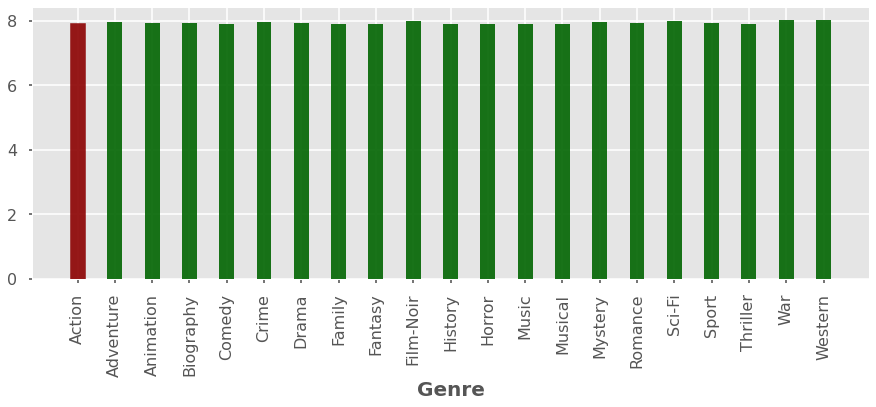

In [103]:
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')

plt.figure(figsize=(15,5))
barplot_genre = plt.bar(x_axis_joined_result, y_axis_joined_result, width=0.4, color='darkgreen', alpha=0.90, align="center")
barplot_genre[0].set_color('darkred')
plt.xlabel('Genre', fontsize = 20, weight = 'bold')
plt.xticks(rotation=90)
plt.show()

In [104]:
joined_gross_result

,Total_Gross,Genre_Count,Averages
Genre,,,
Action,219877.96,152,1446.565526
Adventure,281283.29,168,1674.305298
Animation,85731.37,66,1298.960152
Biography,53045.78,96,552.560208
Comedy,121836.27,184,662.153641
Crime,69426.56,160,433.916000
Drama,273952.14,557,491.835081
Family,44574.34,46,969.007391
Fantasy,60825.44,56,1086.168571


TypeError: 'AxesSubplot' object is not callable

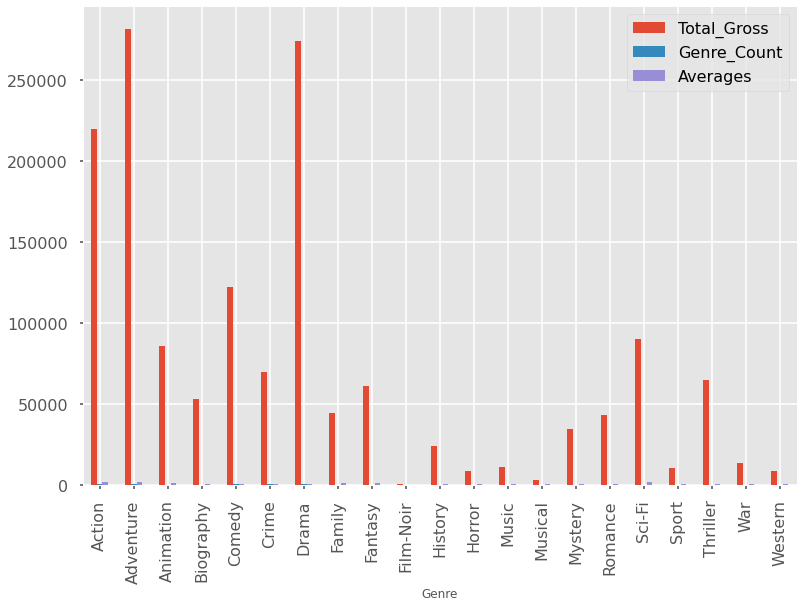

In [105]:
# Create a bar chart based off of the group series from before
joined_gross_result_plot = joined_gross_result.plot(kind='bar')
joined_gross_result_plot(legend=False)

# Set the xlabel and ylabel using class methods
joined_result_plot.set_xlabel("Genre")
joined_result_plot.set_ylabel("Genre_Count")


plt.show()
plt.tight_layout()

In [106]:
joined_certificate_result

,Total Rating,Certificate Count,Averages
Certificate,,,
A,1440.5,180,8.002778
Approved,48.1,6,8.016667
G,80.3,10,8.030000
GP,15.7,2,7.850000
PG,189.7,24,7.904167
PG-13,303.5,39,7.782051
Passed,185.4,23,8.060870
R,1062.7,135,7.871852
TV-PG,8.0,1,8.000000


In [107]:
joined_certificate_gross_result

,Total Gross,Certificate Count,Averages
Certificate,,,
A,114996.84,180,638.871333
Approved,416.94,6,69.490000
G,4959.63,10,495.963000
GP,14.17,2,7.085000
PG,4293.19,24,178.882917
PG-13,14409.69,39,369.479231
Passed,1250.18,23,54.355652
R,34821.37,135,257.936074
TV-PG,1.07,1,1.070000
